# 🌸 Classificazione Iris

Obiettivo: classificare i fiori Iris in 3 categorie usando 4 feature numeriche.  
In questo notebook eseguiamo:

1. Caricamento del dataset Iris  
2. Visualizzazione delle classi  
3. Train/Test split  
4. Standardizzazione delle feature  
5. Grafici prima/dopo lo scaling  
6. Addestramento modello  
7. Valutazione  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid")

## 1. Caricamento del dataset Iris 

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convertiamo in DataFrame per visualizzazione
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Visualizzazione delle classi

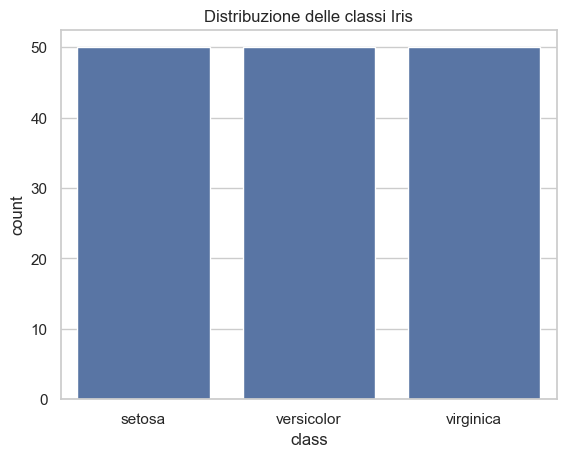

In [3]:
# Mappa target numerico → nome classe
df["class"] = df["target"].map(dict(enumerate(target_names)))

# Distribuzione delle classi
sns.countplot(x="class", data=df)
plt.title("Distribuzione delle classi Iris")
plt.show()

## 3. Train/Test split

In [4]:
X = df[feature_names]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (120, 4)
Test size: (30, 4)


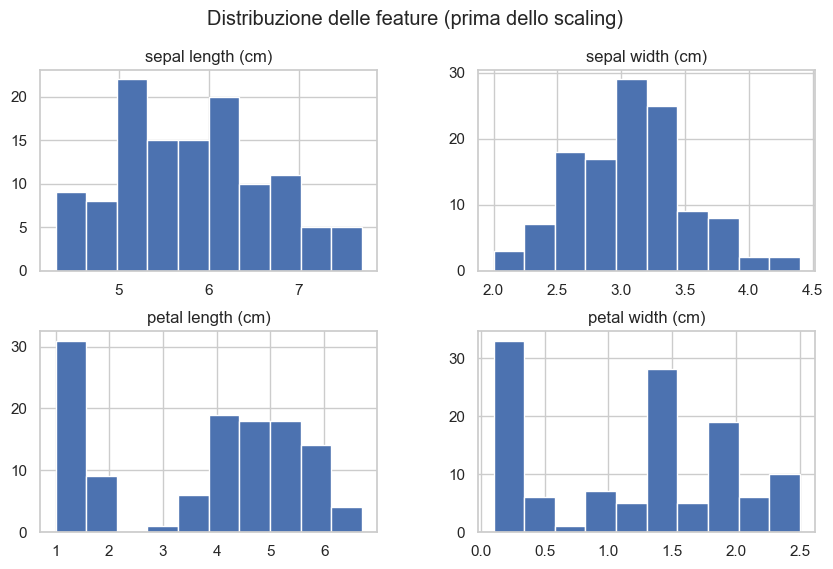

In [5]:
# Distribuzione prima dello scaling
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_train_df.hist(figsize=(10, 6), bins=10)
plt.suptitle("Distribuzione delle feature (prima dello scaling)")
plt.show()

## 4. Standardizzazione delle feature

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Mean:", scaler.mean_)
print("Std:", scaler.scale_)

Mean: [5.80916667 3.06166667 3.72666667 1.18333333]
Std: [0.82036535 0.44724776 1.74502786 0.74914766]


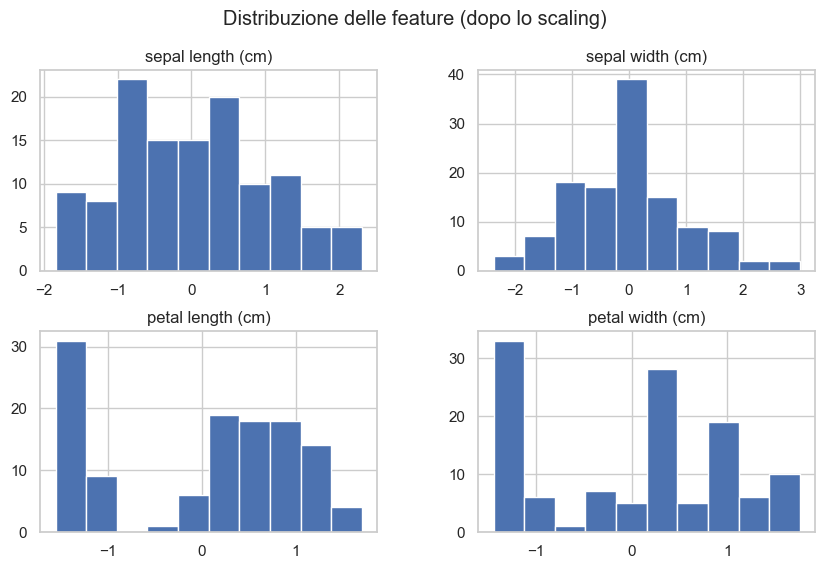

In [7]:
# Distribuzione dopo lo scaling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_train_scaled_df.hist(figsize=(10, 6), bins=10)
plt.suptitle("Distribuzione delle feature (dopo lo scaling)")
plt.show()

## 5. Grafici prima/dopo lo scaling

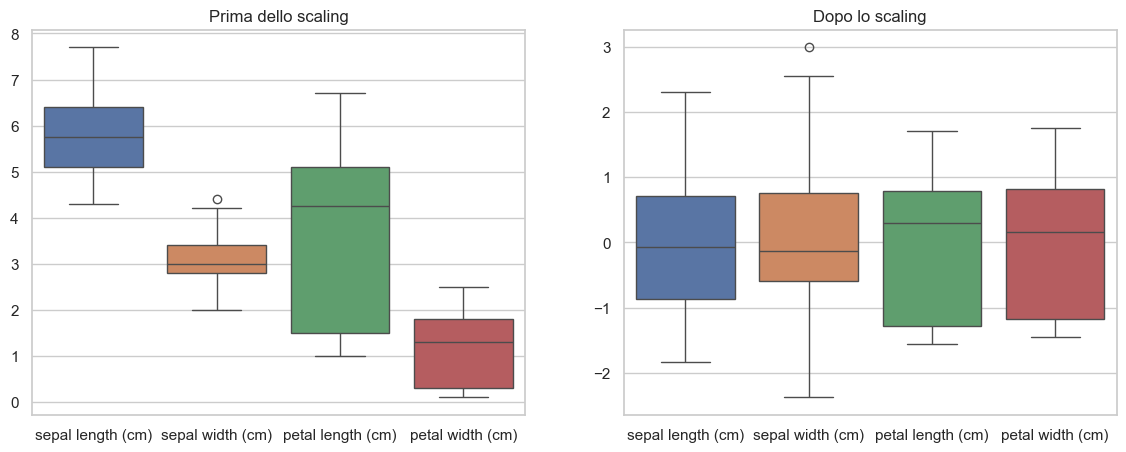

In [8]:
# Boxplot prima/dopo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=X_train_df, ax=axes[0])
axes[0].set_title("Prima dello scaling")

sns.boxplot(data=X_train_scaled_df, ax=axes[1])
axes[1].set_title("Dopo lo scaling")

plt.show()

## 6. Addestramento modello

In [9]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

## 7. Valutazione

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy del modello: {acc:.3f}")

Accuracy del modello: 1.000


## ✅ Conclusioni

- Il dataset Iris è stato caricato e visualizzato correttamente  
- Le feature sono state standardizzate con `StandardScaler`  
- I grafici mostrano chiaramente l'effetto dello scaling  
- Il modello Logistic Regression ha ottenuto un'accuracy elevata  
- Il flusso è pronto per essere esteso con altri modelli o metriche 